In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('C://CAPSTONE//DataSets//Generalised//CSV//Training.csv')
test = pd.read_csv('C://CAPSTONE//DataSets//Generalised//CSV//TestingNB.csv')
train = train.drop('prognosis',1)
test = test.drop('Disease',1)
train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,ID
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [63]:
print(train.shape)
print(test.shape)

(4920, 133)
(52, 133)


In [64]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,ID
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,21.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000


In [65]:
# making training features and labels
train_labels = train['ID']
train_features = train.drop('ID',1)
train_features.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit( train_features , train_labels)

GaussianNB()

In [67]:
# making testing features and labels
test_labels = test['ID']
test_features = test.drop('ID',1)
test_features.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#Predict Output
predictions = model.predict(test_features)

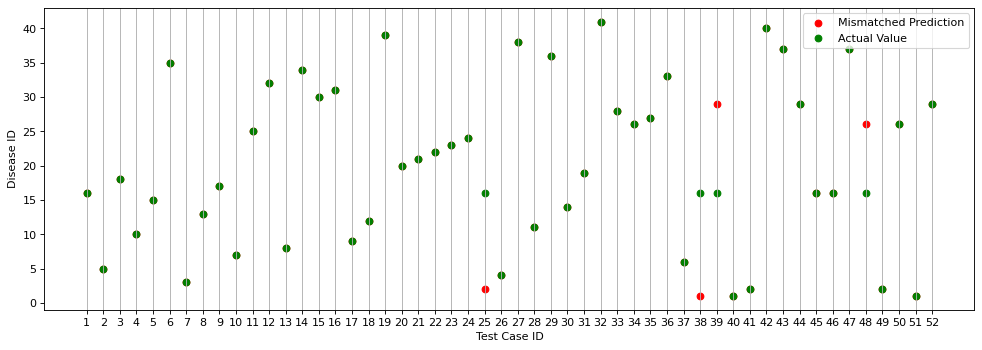

In [69]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

ids = []
for i in range(1,test.shape[0]+1):
    ids.append(i)

#create line chart to show variations
plt.scatter(ids , predictions, label = 'Mismatched Prediction' , color = "Red")
plt.scatter(ids , test_labels, label = 'Actual Value' , color = "Green")
plt.xlabel('Test Case ID')
plt.ylabel('Disease ID')
plt.xticks(np.arange(1,test.shape[0]+1))
plt.legend()
plt.grid(axis = 'x')
plt.show()

In [50]:
import numpy as np

# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.0 degrees.


In [61]:
correct = 0
wrong = 0
for i in range(test.shape[0]):
    if(predictions[i] == test_labels[i]):
        correct = correct+1
    else:
        wrong = wrong+1
print('Accuracy: '+str(round(correct/test.shape[0],4)*100)+'%')

Accuracy: 92.31%
